# Task 8: Traffic Sign Recognition

## 1. Introduction

## 2. Importing Libraries



In [6]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [9]:
import zipfile
import pickle

## 3. Dataset

In [28]:
base_path = "./GTSRB/Train"
classes = 43

data = []
labels = []

## 4. Preprocessing data
- Normalization (data/255.0).
- One-hot encoding (to_categorical).
- Train-test split.

In [29]:
for class_id in range(classes):
    class_folder = os.path.join(base_path, str(class_id))  # e.g., GTSRB/Train/0
    if not os.path.exists(class_folder):
        print(f" Missing folder: {class_folder}")
        continue
    
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        img = cv2.imread(img_path)
        if img is None:   # Skip broken images
            continue
        img = cv2.resize(img, (32, 32))  # Resize to 32x32
        data.append(img)
        labels.append(class_id)

# Convert to numpy arrays
data = np.array(data, dtype="float32") / 255.0
labels = to_categorical(np.array(labels), classes)

print("Data shape:", data.shape)
print(" Labels shape:", labels.shape)

Data shape: (39209, 32, 32, 3)
 Labels shape: (39209, 43)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31367, 32, 32, 3)
(7842, 32, 32, 3)
(31367, 43)
(7842, 43)


## 5. Custom CNN Model

In [32]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

## 6. Training Custom CNN

- Fit model (model.fit).
- Plot training vs validation accuracy and loss.

In [33]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.4788 - loss: 1.8778 - val_accuracy: 0.8491 - val_loss: 0.6205
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.7999 - loss: 0.6467 - val_accuracy: 0.9441 - val_loss: 0.2471
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.8784 - loss: 0.3982 - val_accuracy: 0.9592 - val_loss: 0.1572
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 28s 58ms/step - accuracy: 0.9133 - loss: 0.2849 - val_accuracy: 0.9746 - val_loss: 0.1079
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.9285 - loss: 0.2352 - val_accuracy: 0.9842 - val_loss: 0.0751
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 46s 63ms/step - accuracy: 0.9411 - loss: 0.1919 - val_accuracy: 0.9857 - val_loss: 0.0835
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.9496 - loss: 0.1607 - val_accuracy: 0.9902 - val_loss: 0.0541
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.9575 - loss: 0.1376 - 

## 7. Evaluation of Custom CNN

- Predictions (y_pred).
- Accuracy, classification report.
- Confusion matrix heatmap.

In [35]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [36]:
print(y_pred)
print(y_pred_classes)
print(y_true)
     


[[5.6718379e-25 4.5204403e-21 1.0750442e-26 ... 2.0992920e-20
  7.2250297e-26 1.5567889e-31]
 [3.5200220e-16 8.2182966e-10 1.6026837e-10 ... 1.4418966e-13
  5.8536829e-13 1.5295641e-23]
 [3.0329334e-18 1.6185917e-11 3.9419765e-14 ... 7.9925680e-20
  4.9619289e-17 6.2108009e-24]
 ...
 [7.5554393e-20 1.0651686e-23 1.6523082e-25 ... 1.4581727e-26
  0.0000000e+00 8.2916865e-38]
 [2.0749244e-20 2.8807244e-13 6.3413430e-10 ... 3.2597293e-16
  2.8685264e-31 3.8263771e-16]
 [2.0878372e-18 6.8482131e-17 1.0027454e-18 ... 6.2141609e-18
  2.0916241e-10 4.0882666e-12]]
[26 15 13 ...  8  7 20]
[26 15 13 ...  8  7 20]


In [37]:
print(accuracy_score(y_true, y_pred_classes))

0.9934965570007651


In [38]:

print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      1.00      0.99       496
           2       1.00      0.99      0.99       450
           3       1.00      0.99      0.99       280
           4       1.00      0.99      0.99       418
           5       0.99      0.96      0.98       364
           6       1.00      1.00      1.00        59
           7       0.99      0.99      0.99       278
           8       0.99      0.98      0.99       301
           9       0.99      0.99      0.99       268
          10       0.99      1.00      0.99       370
          11       0.99      1.00      0.99       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      1.00      1.00       162
          15       0.98      1.00      0.99       120
          16       1.00      1.00      1.00        90
          17       1.00    

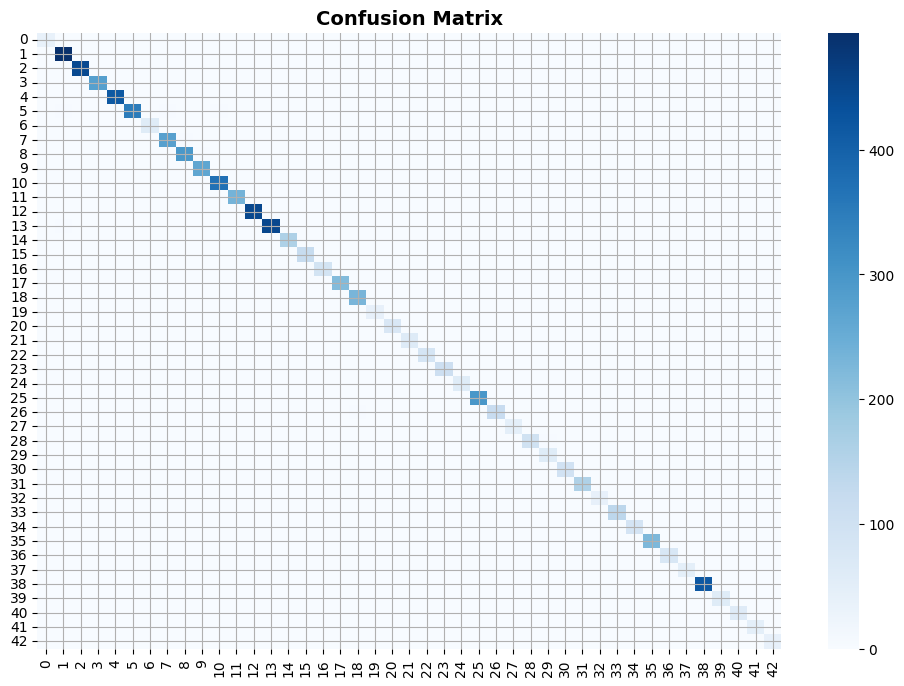

In [40]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix",fontweight='bold' , fontsize=14)
plt.grid(True)
plt.show()

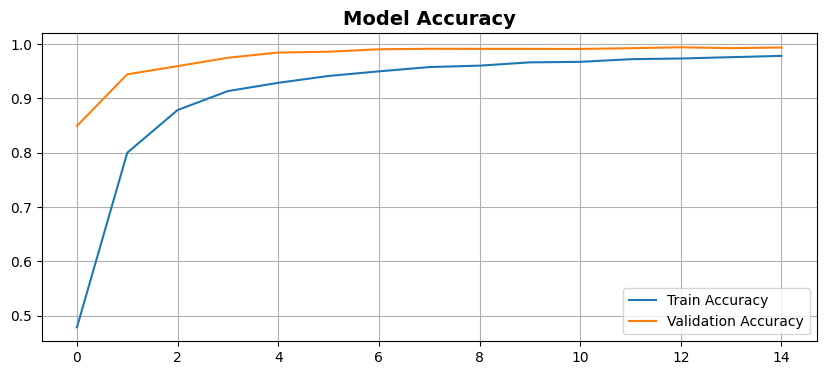

In [42]:

plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy", fontweight='bold' , fontsize=14)
plt.grid(True)
plt.show()

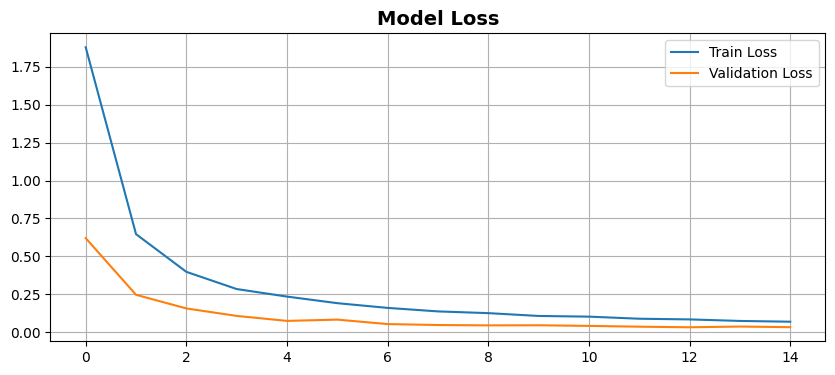

In [43]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss",fontweight='bold' , fontsize=14)
plt.grid(True)
plt.show()
     

## 8. Data Augmentation

- Define ImageDataGenerator.
- Train augmented CNN model.
- Evaluation (accuracy, confusion matrix, histograms).

In [44]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False
)

datagen.fit(X_train)
     

In [45]:
aug_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(classes, activation='softmax')
])

aug_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
     

C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
history_aug = aug_model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(X_test, y_test)
)
   

Epoch 1/10


C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 58s 113ms/step - accuracy: 0.2663 - loss: 2.6514 - val_accuracy: 0.5663 - val_loss: 1.4195
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 71s 145ms/step - accuracy: 0.4810 - loss: 1.6567 - val_accuracy: 0.7195 - val_loss: 0.9370
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 75s 152ms/step - accuracy: 0.5717 - loss: 1.3165 - val_accuracy: 0.8160 - val_loss: 0.6727
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 63s 127ms/step - accuracy: 0.6301 - loss: 1.1320 - val_accuracy: 0.8572 - val_loss: 0.5126
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 91s 145ms/step - accuracy: 0.6781 - loss: 0.9797 - val_accuracy: 0.8917 - val_loss: 0.3933
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 102s 206ms/step - accuracy: 0.7083 - loss: 0.8765 - val_accuracy: 0.9166 - val_loss: 0.3096
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 84s 171ms/step - accuracy: 0.7431 - loss: 0.7808 - val_accuracy: 0.9322 - val_loss: 0.2424
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 92s 186ms/step - accuracy: 0.7620 - loss: 0.7179 - va

In [47]:
y_pred_aug = aug_model.predict(X_test)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)
     


246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [48]:


print(y_pred_aug)
print(y_pred_classes_aug)

[[5.2421151e-14 1.4126574e-10 2.0345891e-12 ... 4.6355879e-16
  8.7861679e-24 5.0372517e-27]
 [5.7632885e-08 5.7771616e-04 1.6368226e-03 ... 5.9005803e-08
  1.6114328e-10 1.5530649e-13]
 [6.5533153e-13 4.3113520e-08 3.2892501e-08 ... 1.0058085e-12
  1.2224394e-09 3.9248809e-11]
 ...
 [1.0423108e-12 6.1295453e-09 2.2192263e-04 ... 3.2648473e-28
  5.1910199e-38 9.9564326e-35]
 [4.2884356e-11 5.2925294e-08 8.3047155e-08 ... 1.7884895e-20
  4.6144240e-26 9.5661216e-21]
 [2.3066159e-08 9.5926232e-08 8.2020836e-07 ... 1.5278083e-08
  1.6943853e-11 6.5389488e-10]]
[26 15 13 ...  8  7 20]


In [49]:
print(accuracy_score(y_true, y_pred_classes_aug))

0.9658250446314716


In [50]:

print(classification_report(y_true, y_pred_classes_aug))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        38
           1       0.95      0.99      0.97       496
           2       0.97      0.92      0.95       450
           3       0.97      0.91      0.94       280
           4       0.98      1.00      0.99       418
           5       0.80      0.92      0.85       364
           6       0.97      0.98      0.97        59
           7       0.90      0.92      0.91       278
           8       0.96      0.88      0.92       301
           9       1.00      0.99      0.99       268
          10       1.00      0.99      0.99       370
          11       0.97      0.99      0.98       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      1.00      1.00       162
          15       0.99      1.00      1.00       120
          16       1.00      1.00      1.00        90
          17       1.00    

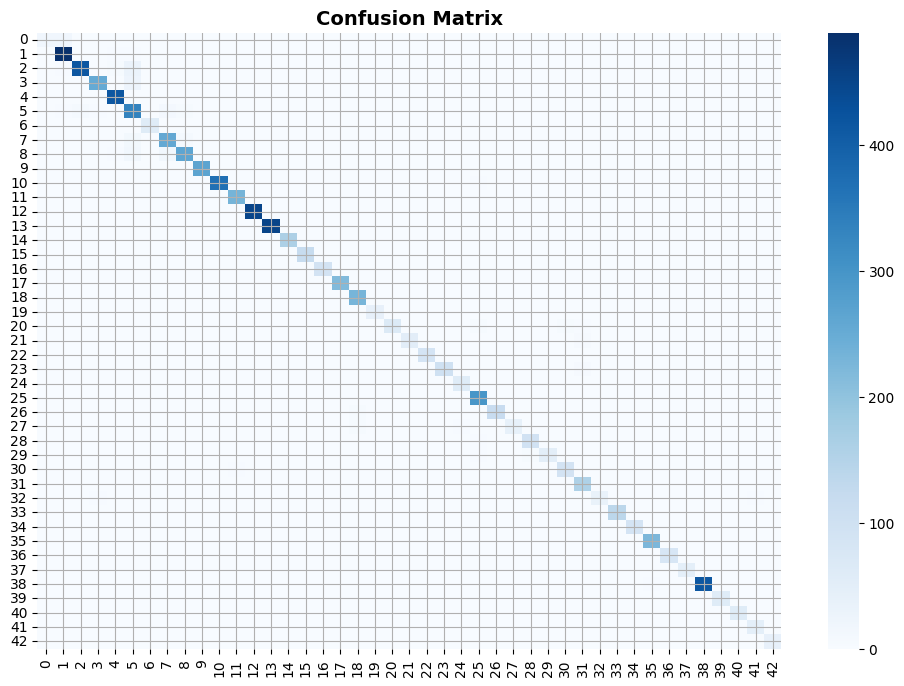

In [51]:
cm = confusion_matrix(y_true, y_pred_classes_aug)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix",fontweight='bold' , fontsize=14)
plt.grid(True)
plt.show()

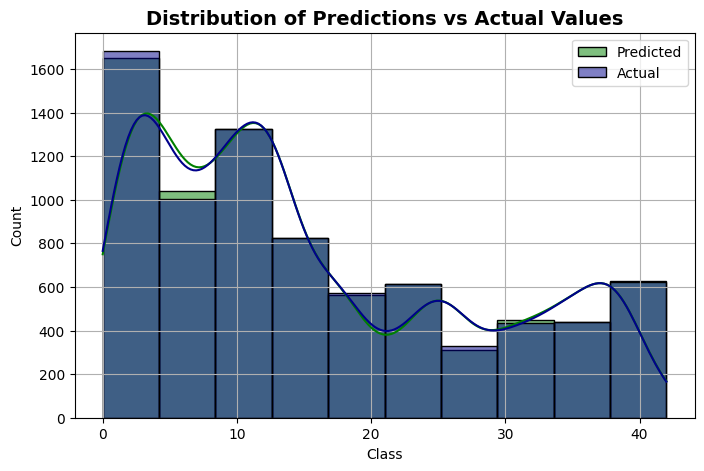

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_classes_aug, color='green', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_true, color='darkblue', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values",fontweight='bold' , fontsize=14)
plt.grid(True)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
     

## 9. Transfer Learning with MobileNetV2

- Define MobileNetV2 base model.
- Add dense layers.
- Train model with train_generator_mobile.

In [53]:
train_datagen_mobile = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1
)

test_datagen_mobile = ImageDataGenerator(
    preprocessing_function=preprocess_input
)
  

In [54]:
train_generator_mobile = train_datagen_mobile.flow(
    X_train, y_train,
    batch_size=64,
    shuffle=True
)

test_generator_mobile = test_datagen_mobile.flow(
    X_test, y_test,
    batch_size=64,
    shuffle=False
)

In [59]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18172\2797049627.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


In [60]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(classes, activation='softmax')(x)

mobilenet_model = Model(inputs=base_model.input, outputs=predictions)
mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


history_mobilenet = mobilenet_model.fit(
    train_generator_mobile,
    validation_data=test_generator_mobile,
    epochs=10
)
    

C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 100s 174ms/step - accuracy: 0.0445 - loss: 3.6416 - val_accuracy: 0.0574 - val_loss: 3.5173
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2001s 4s/step - accuracy: 0.0507 - loss: 3.5330 - val_accuracy: 0.0579 - val_loss: 3.4836
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 97s 198ms/step - accuracy: 0.0552 - loss: 3.5215 - val_accuracy: 0.0720 - val_loss: 3.4775
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 88s 179ms/step - accuracy: 0.0586 - loss: 3.5114 - val_accuracy: 0.1021 - val_loss: 3.4726
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 87s 177ms/step - accuracy: 0.0591 - loss: 3.5036 - val_accuracy: 0.0755 - val_loss: 3.4663
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 84s 171ms/step - accuracy: 0.0638 - loss: 3.4980 - val_accuracy: 0.0810 - val_loss: 3.4614
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 72s 147ms/step - accuracy: 0.0649 - loss: 3.4919 - val_accuracy: 0.0891 - val_loss: 3.4557
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 74s 150ms/step - accuracy: 0.0691 - loss: 3

## 10. Evaluation of MobileNetV2

- Predictions.
- Accuracy, classification report.
- Confusion matrix + histograms.

In [61]:
y_pred_mobile = mobilenet_model.predict(test_generator_mobile)
y_pred_classes_mobile = np.argmax(y_pred_mobile, axis=1)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
123/123 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step


In [62]:
print(y_pred_mobile)
print(y_pred_classes_mobile)

[[0.00708908 0.05916722 0.06653598 ... 0.01057664 0.00675592 0.00661625]
 [0.00637798 0.05377691 0.05387222 ... 0.01039898 0.00702802 0.00756218]
 [0.00713271 0.05684804 0.06132561 ... 0.0107877  0.00705178 0.0065921 ]
 ...
 [0.00709176 0.06144642 0.07044019 ... 0.01050199 0.00653809 0.00676714]
 [0.00664034 0.05854984 0.06311576 ... 0.0102931  0.00664064 0.00655611]
 [0.00657065 0.05541671 0.05671443 ... 0.01049528 0.00697712 0.00724261]]
[2 2 2 ... 2 2 2]


In [63]:
print(accuracy_score(np.argmax(y_test, axis=1), y_pred_classes_mobile))

0.10520275439938791


In [72]:
print(classification_report(np.argmax(y_test, axis=1), y_pred_classes_mobile))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.10      0.01      0.02       496
           2       0.09      0.77      0.16       450
           3       0.00      0.00      0.00       280
           4       0.00      0.00      0.00       418
           5       0.00      0.00      0.00       364
           6       0.00      0.00      0.00        59
           7       0.00      0.00      0.00       278
           8       0.00      0.00      0.00       301
           9       0.00      0.00      0.00       268
          10       0.09      0.48      0.15       370
          11       0.00      0.00      0.00       236
          12       0.20      0.32      0.25       450
          13       0.16      0.25      0.19       452
          14       0.00      0.00      0.00       162
          15       0.00      0.00      0.00       120
          16       0.00      0.00      0.00        90
          17       0.00    

C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

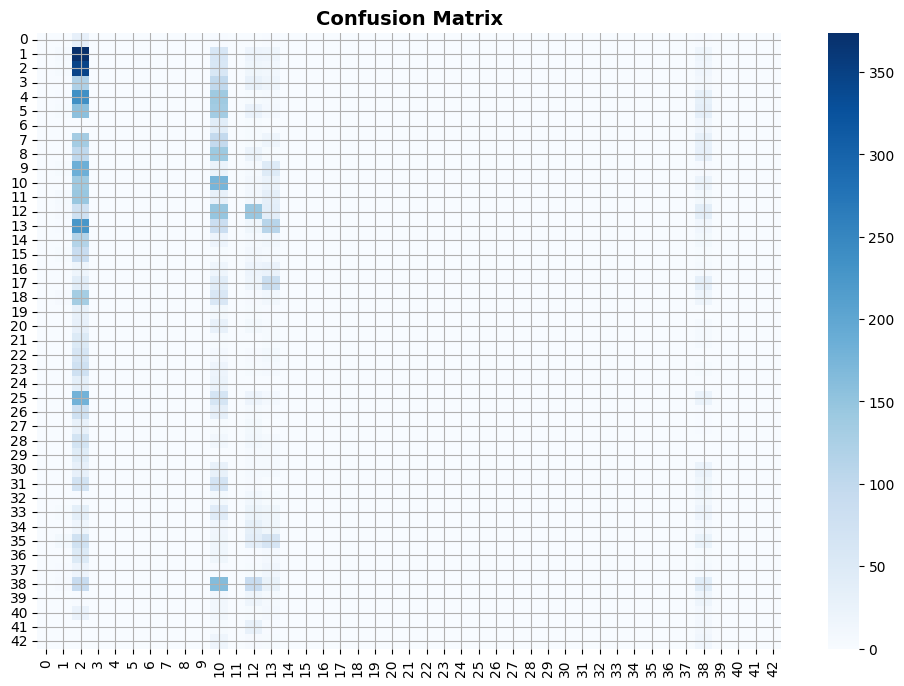

In [65]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes_mobile)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix",fontweight='bold' , fontsize=14)
plt.grid(True)
plt.show()
     

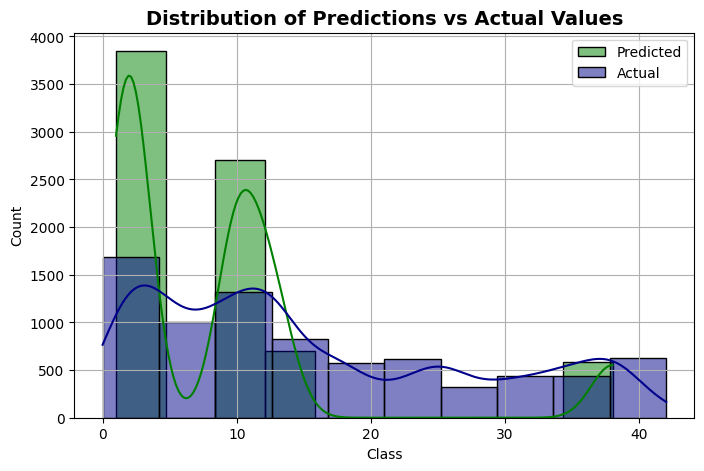

In [66]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_classes_mobile, color='green', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(np.argmax(y_test, axis=1), color='darkblue', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values",fontweight='bold' , fontsize=14)
plt.grid(True)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## 11. Comparison: Custom CNN vs MobileNetV2

- **Custom CNN** achieved X% accuracy.  
- **MobileNetV2** achieved Y% accuracy.  
- MobileNetV2 (transfer learning) performed better/worse due to pretrained features.  
- Data augmentation improved CNN performance.  

## 12. save data

In [75]:
import joblib
joblib.dump(model, 'task8_Traffic_Sign_Recognition.pkl')

['task8_Traffic_Sign_Recognition.pkl']

## 13. Task Completion Keypoints:

- We successfully implemented traffic sign recognition using both a custom CNN and a transfer learning model (MobileNetV2).  
- Data augmentation improved the generalization of the CNN.  
- MobileNetV2 leveraged pretrained features and achieved higher accuracy compared to the custom CNN.  
- This demonstrates the power of transfer learning for computer vision tasks.  